In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
output_data = pd.read_csv('./val_softmax_outputs_epoch26-gtn-0520_203840.csv')

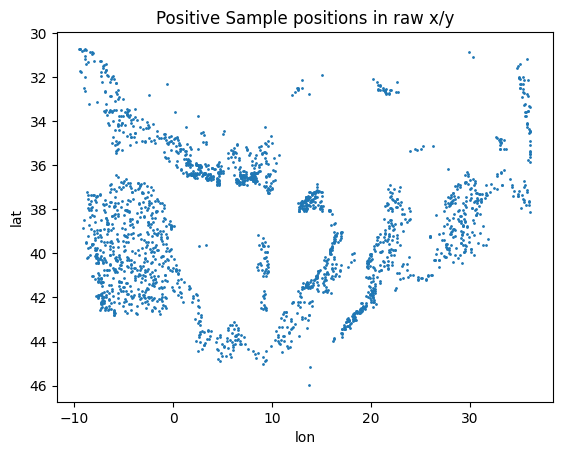

In [13]:
#lon = x, lat = y
plt.scatter(output_data['lon'], output_data['lat'], s=1)
plt.title("Positive Sample positions in raw x/y")
plt.xlabel("lon")
plt.ylabel("lat")
plt.gca().invert_yaxis()  # Wenn Bildkoordinaten (0 oben)
plt.show()

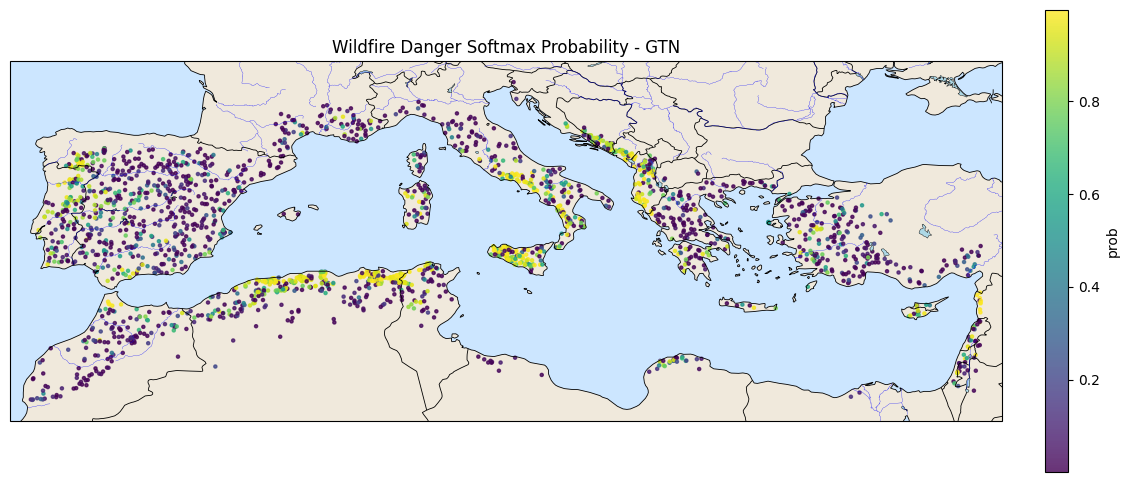

In [9]:
x = output_data['lat']
y = output_data['lon']
influence_variable = output_data['prob'] #softmax probability of each validation sample

# Plot mit Cartopy
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1], crs=ccrs.PlateCarree())
#ax.stock_img()

# Features hinzufügen
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')  
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff') 
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

# Scatter mit Farbe nach Population
sc = ax.scatter(x, y, c=influence_variable, cmap='viridis', s=5, alpha=0.8, vmin=influence_variable.min(), vmax=influence_variable.max(), transform=ccrs.PlateCarree())

# Farbskala
cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cb.set_label(f'{influence_variable.name}')

# Titel
plt.title("Wildfire Danger Softmax Probability - GTN")

plt.show()